In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# import the metadata file and read the first five rows
file_name = '../data/metadata.csv'
df = pd.read_csv(file_name)
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:
# look for columns with null values
df.isnull().sum()

patientid                   0
offset                    253
sex                        80
age                       237
finding                     0
RT_PCR_positive           357
survival                  589
intubated                 702
intubation_present        700
went_icu                  553
in_icu                    615
needed_supplemental_O2    860
extubated                 913
temperature               872
pO2_saturation            831
leukocyte_count           934
neutrophil_count          922
lymphocyte_count          910
view                        0
modality                    0
date                      289
location                   56
folder                      0
filename                    0
doi                       568
url                         0
license                   245
clinical_notes            182
other_notes               514
Unnamed: 29               945
dtype: int64

In [6]:
df.shape

(950, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

# Clean and Visualize data


In [8]:
# select the important columns
cols = ['patientid', 'sex', 'age', 'finding', 'RT_PCR_positive', 'survival']
df= df[cols]
df.head()

,patientid,sex,age,finding,RT_PCR_positive,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y
1,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y
2,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y
3,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y
4,4,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patientid        950 non-null    object 
 1   sex              870 non-null    object 
 2   age              713 non-null    float64
 3   finding          950 non-null    object 
 4   RT_PCR_positive  593 non-null    object 
 5   survival         361 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.7+ KB


In [10]:
# drop duplicates in patientid
df.drop_duplicates(subset=['patientid'], inplace = True)
df

,patientid,sex,age,finding,RT_PCR_positive,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y
4,4,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN
6,5,NaN,NaN,Pneumonia,NaN,NaN
7,6,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN
9,3,M,74.0,Pneumonia/Viral/SARS,NaN,N
...,...,...,...,...,...,...
941,477,F,60.0,Pneumonia/Bacterial/Legionella,NaN,NaN
943,478,F,75.0,No Finding,NaN,NaN
945,479,F,40.0,Pneumonia,NaN,NaN
947,480,M,26.0,Pneumonia,NaN,NaN


In [11]:
# read the unique values in finding column
df.finding.unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [12]:
# read finding column and create a new column called finding_res
# finding_res contians 1 for covid while 0 for others
df.loc[df['finding'] == 'Pneumonia/Viral/COVID-19', 'finding_res'] = 1 
df.loc[df['finding'] != 'Pneumonia/Viral/COVID-19', 'finding_res'] = 0 
df

,patientid,sex,age,finding,RT_PCR_positive,survival,finding_res
0,2,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,1.0
4,4,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,1.0
6,5,NaN,NaN,Pneumonia,NaN,NaN,0.0
7,6,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,1.0
9,3,M,74.0,Pneumonia/Viral/SARS,NaN,N,0.0
...,...,...,...,...,...,...,...
941,477,F,60.0,Pneumonia/Bacterial/Legionella,NaN,NaN,0.0
943,478,F,75.0,No Finding,NaN,NaN,0.0
945,479,F,40.0,Pneumonia,NaN,NaN,0.0
947,480,M,26.0,Pneumonia,NaN,NaN,0.0


In [13]:
# reorder the columns
df = df[['patientid', 'sex', 'age', 'finding', 'finding_res', 'RT_PCR_positive', 'survival']]
df.head()

,patientid,sex,age,finding,finding_res,RT_PCR_positive,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,1.0,Y,Y
4,4,F,52.0,Pneumonia/Viral/COVID-19,1.0,Y,NaN
6,5,NaN,NaN,Pneumonia,0.0,NaN,NaN
7,6,NaN,NaN,Pneumonia/Viral/COVID-19,1.0,Y,NaN
9,3,M,74.0,Pneumonia/Viral/SARS,0.0,NaN,N


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 948
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patientid        472 non-null    object 
 1   sex              428 non-null    object 
 2   age              357 non-null    float64
 3   finding          472 non-null    object 
 4   finding_res      472 non-null    float64
 5   RT_PCR_positive  315 non-null    object 
 6   survival         135 non-null    object 
dtypes: float64(2), object(5)
memory usage: 29.5+ KB


In [15]:
# fill the NaN values in survival column with Unknown
df["survival"].fillna("Unknown", inplace=True)
df

/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,patientid,sex,age,finding,finding_res,RT_PCR_positive,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,1.0,Y,Y
4,4,F,52.0,Pneumonia/Viral/COVID-19,1.0,Y,Unknown
6,5,NaN,NaN,Pneumonia,0.0,NaN,Unknown
7,6,NaN,NaN,Pneumonia/Viral/COVID-19,1.0,Y,Unknown
9,3,M,74.0,Pneumonia/Viral/SARS,0.0,NaN,N
...,...,...,...,...,...,...,...
941,477,F,60.0,Pneumonia/Bacterial/Legionella,0.0,NaN,Unknown
943,478,F,75.0,No Finding,0.0,NaN,Unknown
945,479,F,40.0,Pneumonia,0.0,NaN,Unknown
947,480,M,26.0,Pneumonia,0.0,NaN,Unknown


In [16]:
# fill the NaN values in RT_PCR_positive with Unknown
df["RT_PCR_positive"].fillna("Unknown", inplace=True)
df.head()

/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,patientid,sex,age,finding,finding_res,RT_PCR_positive,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,1.0,Y,Y
4,4,F,52.0,Pneumonia/Viral/COVID-19,1.0,Y,Unknown
6,5,NaN,NaN,Pneumonia,0.0,Unknown,Unknown
7,6,NaN,NaN,Pneumonia/Viral/COVID-19,1.0,Y,Unknown
9,3,M,74.0,Pneumonia/Viral/SARS,0.0,Unknown,N


In [17]:
df.isnull().sum()

patientid            0
sex                 44
age                115
finding              0
finding_res          0
RT_PCR_positive      0
survival             0
dtype: int64

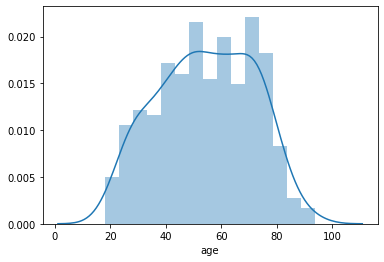

In [18]:
# make a copy of the dataframe
copy = df.copy()
# drop all nan values and plot the distriution of the age
copy.dropna(subset=['age'], inplace=True)
sns.distplot(copy.age, bins=15)

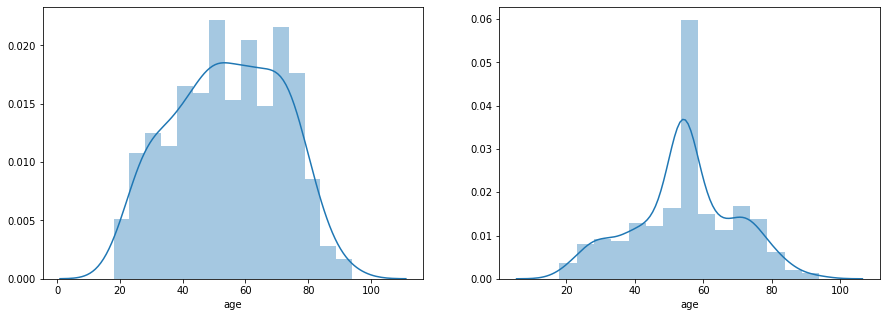

In [19]:
copy = df.copy()
# fill NaN values in age column with mean value
copy.age.fillna(copy["age"].mean(), inplace = True)
#create a subplot with 2 figures to see how the age distribution changed
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#first the age distribution without nan values and second the nan values replaced with mean value
sns.distplot(df.dropna().age, bins=15, ax=ax[0])
sns.distplot(copy.age, bins=15, ax=ax[1])

In [20]:
# create a function and generate random numbers between (mean - std) and (mean + std) for the NaN values
def age_generator(data):
    age_avg = data['age'].mean()
    age_std = data['age'].std()
    age_null_count = data['age'].isnull().sum()
    age_null_random_list = np.random.randint(
        age_avg - age_std, age_avg + age_std, size=age_null_count)
    data['age'][np.isnan(data['age'])] = age_null_random_list
    return df

/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


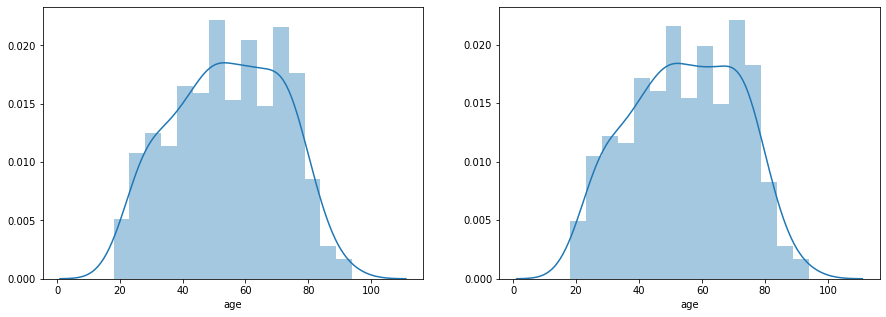

In [21]:
# again create a copy of our dataframe and apply the age_generator function to it
copy = df.copy()
copy = age_generator(copy)
# plot again the distribution of the age
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df.dropna().age, bins=15, ax=ax[0])
sns.distplot(copy.age, bins=15, ax=ax[1])

In [22]:
# apply the generated random age to df dataframe
df = age_generator(df)

# the age column should be clean now
df.isnull().sum()

/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


patientid           0
sex                44
age                 0
finding             0
finding_res         0
RT_PCR_positive     0
survival            0
dtype: int64

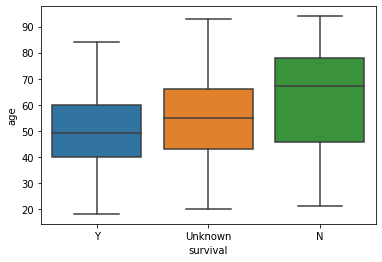

In [23]:
# plot of survival column and age column
sns.boxplot(x='survival', y='age', data=df)

The range of the non-survival(N) shows to be high. But this doesn't give a good insight into the covid-19 finding/survival.

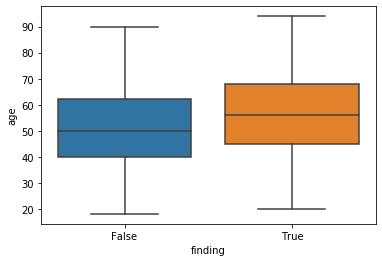

In [24]:
# plot of age column and finding (where finding = covid)
age = df['age']
finding_cov = df['finding'] == 'Pneumonia/Viral/COVID-19'
sns.boxplot(x=finding_cov, y=age)


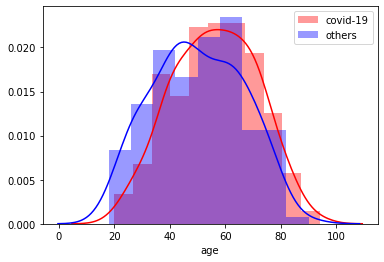

In [25]:
#filtering df to plot first for covid-19 and then for others
sns.distplot(df.loc[df.finding_res == 1, 'age'], color='red', label='covid-19')
sns.distplot(df.loc[df.finding_res == 0, 'age'], color='blue', label='others')
plt.legend()

Both seem to have a close peak. However, finding on covid shows to be high in older age. 

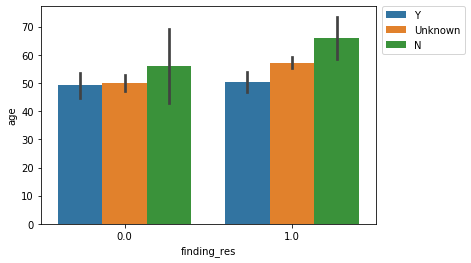

In [26]:
# plot of finding_res against age with surivival column set to hue
sns.barplot(x='finding_res', y='age', data=df, hue='survival')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

shows the non-survival(N) on both covid and other is more in older age. while younger age show to survive more

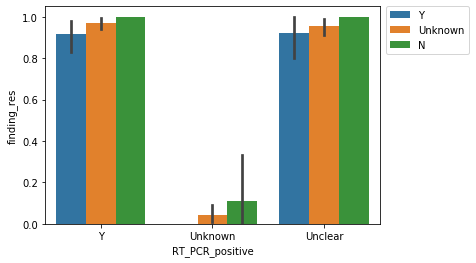

In [27]:
# plot of RT_PCR_positive against finding_res with surivival column set to hue
sns.barplot(x='RT_PCR_positive', y='finding_res', data=df, hue='survival')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

This shows a similar pattern as the above plot. However, the unclear RT_PCR_positive shows to be siginficant which can be a result of no finding, unclear covid rest or other factors. 

In [28]:
# drop the sex column
df.drop(columns=['sex'], inplace=True)
df.isnull().sum()

/Users/hquos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


patientid          0
age                0
finding            0
finding_res        0
RT_PCR_positive    0
survival           0
dtype: int64

### REMARK: 
Analysis of the dataset doesn't show one will have higher chance of surviving covid by use of x-ray (as expected given it is just an equipement in use). However, given the repeated need for a covid test, its fastness and detailed orientation makes it a good option of use. Also, considering its sustainability and the inconvience caused by swab testing makes it valid for use.